## Clustering problem with water molecules ##

**1.1 - Introduction**

The problem of grouping a set of atoms into the molecules they belong to is dealt with in this project by using some elements from graph theory. To illustrate the results, the atoms and their bonds are then plotted in a 3D interactive graph.  

This problem has emerged because of the need to use algorithms to organise large quantities of atomic data in Condensed Matter Physics and Chemistry without necessarily having a strong background in coding, since there are no specific python libraries to deal with problems like this one. Part of the code from this project will be part of a library whose aim is to simplify the life of many people who have the need to solve this or similar problems on a daily basis in their study field.

This problem has been addressed by building two functions: one that only makes use of basic library elements like arrays and lists and is mostly aimed to illustrate a simpler solution that requires a longer computational time (proportional to the square of the number of atoms to cluster) and is tailored to the fact that we are looking at data from water molecules. The other function uses more complex elements such as a K-D Tree and has a much shorter computational time when it comes to large data sets (proportional to the number of atoms to cluster times its the logarithm in base 2) and can be used with any kind of molecule.

**1.2 - Mathematical Background**

To find connections between objects, in other words a graph, is the main topic of study of graph theory and as such some concepts from this field can be useful in dealing with the problem explored in this project. What is properly known as a graph is an ordered pair made of a set of vertices and a set of edges, where a vertex is one of the elements of our set (in our case, an atomic position in 3D space) and an edge is a connection between two edges (in our case, an atomic bond). A graph can be either directed or undirected, depending on if the edges have a direction or not associated to them, respectively. If two vertices have a connection between them, they are bonded and part of the same molecule. $^{[1]}$

The complication arises from the fact that not all atoms in the same molecule are bounded to each other, for example in a water molecule (H -- O -- H) the Oxygen atom will be connected to both the Hydrogen atoms but the two Hydrogen atoms will not be connected to each other. If we classified the molecules according to the bonds between atoms, then we would have that each Oxigen - Hydrogen pair would form a new molecule, so we need a different approach. Here we are not considering the Hydrogen-Hydrogen bonds between different molecules, but only the covalent bond that exists between Oxigen and Hydrogen which we will be able to isolate by an appropriate choice of bonding length. 

In the first function have made use of what is called an adjacency matrix, which is a matrix $A_{ij}$ that contains a $1$ every time the vertex $i$ is connected to the vertex $j$ and a $0$ otherwise. If we specify the number of atoms $N$ that compose the molecules we are interested in and there is one central atom that is connected to all the others, we can look for the rows of the matrix whose elements sum to exactly $N - 1$. Because of the way I intend to use the function to obtain the list of atoms grouped by molecule, I need to create an adjacency matrix where each element on the diagonal is equal to 1 and look for the rows of the matrix whose elements sum to exactly $N$. $^{[1]}$

In this report we are using data from water molecules, so this approach works perfectly. As a condition for connection we use the distance between two atoms and we set it to be between $0.8$ and $1.5$ Angstroms, which is where the Oxigen-Hydrogen covalent bond lies. For different molecules we would have to use different bound lengths. If the molecules we are interested in don't have a central atom connected to every other one which is part of the molecule, this approach wouldn't be of much use and we would have to employ the second function. 

In the second function I have made use of what is called a K-Dimensional Tree, a structure deriving from graph theory but mostly used in computer science, which is used for organising data in a K-Dimensional space. This makes it ideal for searches involving a multi-dimensional search key, which is what we are essentially trying to do in our problem: looking for nearest neighbours of each data point within a certain distance. The resulting structure appears quite complicated graphically, but is essentially a generalised case of a binary tree with K-Dimensional vertices. In the language we have used before, a binary tree is a directed graph in which each vertex has at most two connections directed away from itself (called children) and each child can be a left one, in case the numerical property on which the tree is built is lower on the child when compared to the "parent" and all the "grandparents", or a right one, in case the property is higher. In our case the numerical property is the euclidean distance. $^{[1 - 5]}$   



**2 - Methods**

To study how to best deal with this problem, I have made use of data sets of increasing number of atoms. $^{[6]}$ To make the functions independent from the script and freely exportable, I have imported the required commands from the modules inside the functions themselves. The only global exports I have to make are the magic command required to use the matplotlib notebook in Jupyter and the loadtxt function necessary to import the data from the files. $^{[2]}$

In [4]:
%matplotlib notebook
from numpy import loadtxt

The first function uses the approach I have highlighted in section 1.1, building an adjacency matrix and looking for the rows which elements sum to $N$ for an $N$-atomic molecule with a central atom connected to all others. 

A distance function is defined as the euclidean distance between two points in 3D space, as the atomic positions will be made of 3D arrays that contain the (x, y, z) coordinates of the atoms in Angstrom. The distance is obtained by taking the sum of the squares of the differences between the x-coordinates, the y-coordinates and the z-coordinates of the two atoms we want to calculate the distance of, then taking the square root of this sum using the sqrt command. The coordinates are obtained by taking the 0th, 1st and 2nd elements of the arrays that describe the positions of the two atoms.    

A matrix with all zero entries is created using the "zeros" command, then each time the difference between the i-th and j-th atoms is within the range we are interested in (in our case, between 0.8 and 1.5) or is a diagonal element (see the third-last paragraph as to why I do this) the $A_{ij}$ element of the matrix is changed to a 1. This is made by using two nested "for" loops and an "if" condition that makes use of the distance function previously defined. To do this we would require the number M of atoms in the set, a number that we can obtain by looking with the "len" command at the dimension of the data array, which will be a 3-Dimensional array with M entries. 

Finally, it's time to create the array containing the clusters of atomic positions that belong to the same molecule, given the number of atoms that belong to one molecule. Creating an array directly has the disadvantage of having to specify the dimensions in advance or in any case having less flexibility when inserting elements, therefore I have chosen to use a list (called "mol_list" in the code) to insert the atomic positions at will and then convert that list into an array when all the atoms belonging to the molecule have been added. This newly converted array is then included in a bigger list (called "mol_matrix" in the code) which in the end is converted into an array as well and it's this that the function returns. The "mol_list" is emptied every time its contents are added to "mol_matrix". 

To build each "mol_list", I look for the rows of the adjacency matrix whose sum is exactly $N$ and for each of the elements equal to 1 included in that row I append the ith atomic position (corresponding to the ith column of the chosen element) to "mol_list". If I had not made all the diagonal elements equal to 1 as well, only the two single-bonded atoms and not the double-bonded atoms would have been appended to "mol_list". 

To do all of this, I need to import the "array", "zeros" and "sqrt" commands from numpy. $^{[2]}$

The function takes as input the number of atoms per molecule, the lower and upper limits of the distance between two atoms for them to be considered part of the same molecule and a M x 3 array containing the M atomic positions. 

In [5]:
def bond(n, l, u, data):
    """This function identifies which atoms belong to the same molecule accoding to their relative distance, builds an adjacency matrix to conserve the information about
    the connections and from that builds and returns an array containing the atomic positions divided by molecule of belonging. The function takes as arguments the number of 
    atoms per molecule, the lower and upper limits of the distance between to atoms that determines that they belong to the same molecule and an M by 3 matrix which 
    contains the 3D atomic positions of the atoms to cluster."""
    
    from numpy import array, zeros, sqrt 
    
    def dist(a,b):
        """This function takes as input two 3D arrays and returns their euclidean distance."""
        return sqrt((b[0] - a[0])**2 + (b[1] - a[1])**2 + (b[2] - a[2])**2)
    
    m = len(data) #using the length function we find the number of atoms in the data file and assign the "m" variable to it
    adj = zeros((m,m)) 
    
    """The following nested 'for' loops iterate through all the a_ij elements of the zeros matrix we just created and convert an element to a 1 if the element is on the diagonal 
    or the distance between the i-th and the j-th atom is within the upper and lower limits taken by the bond function as input."""    
    
    for i in range(m):
        for j in range(m):
            if i == j:
                adj[i,j] = 1
            if l <= dist(data[i], data[j]) <= u:
                adj[i,j] = 1
    
    mol_list = []
    
    mol_matrix = []
        
    """The following loops and if branches identify the rows which elements sum to exactly n and for each jth element of that row which is equal to 1 the jth atomic position is 
    appended to mol_list. Once all the elements of the row are examined, mol_list is converted to an array and appended to mol_matrix and emptied. Once all the rows have been
    examined, mol_matrix is converted to an array and returned."""
    
    for i in range(m):
        if sum(adj[i,:]) == n: 
            for j in range(m):
                if adj[i,j] == 1:
                    mol_list.append(data[j])
            mol_matrix.append(array(mol_list))
            mol_list = []
    
    mol_matrix = array(mol_matrix)
    
    return mol_matrix

The second function makes use of the K-Dimensional Tree command from the scipy spatial module. Since every atomic position only has coordinates in 3 dimensions, we will obtain a 3-Dimensional Tree. 

First, we organise our data in a tree by using the "KDTree" command and then the "query_pairs" command to look for pairs of entries whose distance (defined as the euclidean distance within the command) is smaller than an upper limit. This way, we obtain a list of the pairs of atoms that are at less of the specified distance without repetitions. The "KDTree" command is a class which associates to each 3D point an index which can be used to quickly find the nearest neighbour distance between two atomic positions, so that our set is now in the most efficient form to find the pairs of atoms which are within a certain distance by using the "query_pairs" method. $^{[7]}$ 

The next step is to merge these pairs into triples every time we find that two pairs have one element in common. To do this I use the peculiarity of sets of not allowing repeated elements: by merging two pairs into a list and transforming that list into a set, if the two pairs had elements in common the set will have a different length when compared to the list. In case this happens, we append the set to a list of triples. $^{[2]}$ This process could continue by merging triples to have quadruples, and then merge these to have quintuples and so on, so that this method can be adapted to any number of atoms per molecule without having the requirement of one central atom connected to all the others as we did in the previous function. By using the condition to check only for the ith and jth pairs such that i < j the loop will be prevented from creating two times the same triple.

To do all this, we must import the "array" command from the Numpy module and the "KDTree" command from the Spatial package from Scipy. 

The function takes as arguments the upper limit for the search for atomic pairs and the M x 3 matrix containing the atomics positions. 

In [6]:
def bond_2(u, data):
    """This function takes a set of atomic positions and clusters them into groups of 3 atoms according to which atoms belong to the same molecule by organising the data set into a 
    K-Dimensional Tree, looking for nearest neighbours pairs and then merging those pairs into triples by looking for the pairs that have one element in common. The function takes
    as arguments the upper limit for the distance between two atoms to be considered belonging to the same molecule and the M by 3 matrix containing the atomic positons of M 
    atoms in three dimensions. The function returns a matrix containing the atomic positions grouped by molecule of belonging."""
    
    from numpy import array
    
    from scipy.spatial import KDTree

    """By using the KDTree command on the data we reorganise it from a Mx3 matrix to a 3D tree, from which we then look for nearest neighbours by using the query_pairs
    method and label them 'pairs'. These are not the actual atomic positions but just the indices in the tree so in the end we will have to look for the atomic positions corresponding 
    to the indices.""" 
    
    tree = KDTree(data) 
    
    pairs = tree.query_pairs(u)
    
    triples = []
    
    """With the following nested loops and if branches, we go through each couple of pairs elements once, we merge the four elements of the two pairs into a list and we create
    a set from that list. If the dimension of the set are different from that of the list, i.e. if the list contained a repeated element, then we have found two pairs which have an element
    in common and we can append that set to a list which we call 'triples'."""
    
    for i in pairs: 
        a, b = i[0], i[1]
        for j in pairs: 
            c, d = j[0], j[1]
            if i < j:
                m_list = [a, b, c, d]
                m_set = set(m_list)
                if len(m_list) != len(m_set): 
                    triples.append(m_set)

    """We have now obtained a list of the indices of the triples of elements which belong to the same molecule, so all that is left to do is to convert this into a list of triples of the 
    3D atomic positions. We can do this by choosing a triple, creating a list called 'molecule', appending the atomic positions corresponding to the indices of the triple and 
    appending such list to a bigger one called 'molecule_list'. The 'molecule' list is then emptied before we proceed to do the same for the next element of the 'triples' list. 
    The resulting 'molecule_list' is converted to array and returned. """ 
    
    molecule_list = []
    
    for i in triples: 
        molecule = []
        for j in i:
            molecule.append(data[j])
        molecule_list.append(molecule)
    return array(molecule_list)

The last function I require only for illustrative purposes and is the one that creates the interactive plot. If I had used a fixed point of view plot depicting the atoms and their bonds, after getting to more than 20 atoms the picture would have become very confusing to look at. 

To make use of an interactive version of the 3D plot, I import the "interact" command from the upywidgets module, making it possible to interactively tune a variable called "angle" which specifies the rotation angle of the plot from the intial 30 degrees rotation. I then specify that every time I change the "angle" interactively, the plot should be cleared and re-plotted from the new point of view. 

To create a 3D plot I need to import the "Axes3D" command from the mpl_toolkits.mplot3d module and the "draw", "plot" and "figure" commands from matplotlib.pyplot. 

First, I open an image space by using the figure command and I assign the label fig to that. Then, I initialise the 3D plot by using the Axes3D command and I assign the ax label to it. I can now recreate as many many times as I need my plot by using the 3D axes as basis: 

- With the view_init command the axes are rotated by the angle specified by the variable with the same name. 

- With the clear command I clear the previous plot (if present).

- With the draw command I intialise the plotting process. 

- With the scatter command I create a scatter graph in order to get the spheres that will represent my atoms, specifying that their dimension has to be larger than the default with the "s" optional argument of the scatter function. This function takes as arguments the three column vectors which specify respectively the x positions, the y positions and the z positions of the atoms I am analysing by splitting the position matrix into three columns. Since this command has been made to plot functions, I have to define the positions as a function that associates to an (x,y) coordinate a z = f(x,y) value which corresponds to the z component of the molecule position. 

- With a for loop to go over each of the sublists that specify the atoms that belong to the same molecule that I have obtained by using one of the bond functions that I defined above, then with the plot command I again plot a function that goes through the atomic positions of the three atoms (since we are using water molecules data, a different number of atoms per molecule will occur in different cases). Since I am using the plot command, the resulting plot will look like a line going through the positions of the three atoms, in other words it will look like a bond between the three atoms.  

The interactive graph will be used to show that atoms that are reasonably close to each other are considered as part of the same molecule and the lines that connect them don't necessarily represent actual molecular bonds but are only a representation of the fact that the atoms belong to the same molecule. This will also mean that for different methods the representation may appear slightly different, but nonethless the original aim of grouping atoms into molecules will be fulfilled.  

In [7]:
def interactive_graph(atoms, molecules):
    """This function takes a set of atomic positions and plots them as spheres on a 3D graph with lines joining atoms representing the fact that they belong to the same molecule.
    The function takes as arguments an M by 3 matrix containing the M atomic positions in 3D and an N by 3 by 3 matrix containing the same positions grouped by the N 
    molecules they belong to."""
    
    from mpl_toolkits.mplot3d import Axes3D
    
    from matplotlib.pyplot import draw, plot, figure
    
    """First, we intialise the figure and the 3D axes on it."""
    
    fig = figure()
    ax = Axes3D(fig)
    
    from ipywidgets import interact

    """Then we create a graph that can be rotated using the interact command by modifying a parameter called 'angle' from 0 to 360 degrees with sensitivity of 10 degrees.
    To do this we have to clear every time the graph and replot it rotated by the new angle. We plot on the same axes N + 1 functions: the first one is a scatter graph representing
    the atoms as spheres and is interpreted as a 2D function that associates to an (x,y) coordinate of an atom an f(x,y) function which is the z coordinate of the atomic position. 
    The other N are line plots that are still interpreted in the same way as the previous one (function in 2 dimensions) and join the atomic positions in the order they appear in their
    molecular clustering. The for loop goes though each molecule subgroup so that we plot each of the N molecules as different graphs and obtain that the lines represent belonging
    to the same molecule."""
    
    @interact(angle=(0,360,10))
    def show(angle):
        ax.view_init(30, angle)
        ax.clear()
        draw()
        ax.scatter(atoms[:, 0], atoms[:, 1], atoms[:, 2], s=100, depthshade=False)
        for i in range(molecules.shape[0]):
            ax.plot(molecules[i, :, 0], molecules[i, :, 1], molecules[i, :, 2], "r")

Finally, using the loadtxt command we import the data from .xyz files. This command takes as argument the address of the files we intend to import, but in our case the files have the first two rows dedicated to give the number of atomic positions in the file and the source of the data and thus we need to use the skiprows optional argument to have the command ignore the first two rows. If we didn't, the command wouldn't execute properly because the rows wouldn't all have the same structure (i.e. 3 numbers in succession). The other "issue" is that the file also contains an additional column, in addition to the 3 we are interested in, which contains the symbol of the element the position corresponds to. Since we are not interested in this and once more the command wouldn't execute properly because of the presence of letters instead of numbers, we use the optional argument usecols to indicate that we want to load the second, the third and the forth column.   

In [8]:
Water_data = loadtxt("project3_data/01_Water_92_85.xyz", skiprows=2, usecols=(1,2,3))

In [9]:
Prism_data = loadtxt("project3_data/01-Prism.xyz", skiprows=2, usecols=(1,2,3))

In [10]:
Mystery_data = loadtxt("project3_data/H2O_n16_4444-a.xyz", skiprows=2, usecols=(1,2,3))

In [11]:
Mixed_data = loadtxt("project3_data/H2O_cluster_mixed.xyz", skiprows=2, usecols=(1,2,3))

**4 - Results**

The first and the second files contain respectively 9 and 18 atomic positions, while the last two contain 48 and 72. To show that the two "bond" functions provide us with the same results I have chosen to use the first and the second case and displayed the results for both the methods. The last two would have been quite tricky to compare since what the two functions return is a list of the atomic positions grouped by molecule of belonging in no particular order and very often in different order for different methods.

The first three data sets represent the "supervised" part since the molecules in the files were already ordered and labeled by molecule of belonging, so that by direct comparison with the original files we can verify that the "bond" functions work as intended, but the last data set is the actual proof of validity since it hadn't been previously ordered. We will be able to obtain a visual proof of the fact that the "bond" functions don't require an ordered data set to return the correct clustering.  

For the first data set, we can see that the first molecule is the same for both methods, the second molecule of the first method is the same as the third molecule of the second method and the remaining molecule has the atoms in different positions for different methods but clustered in the same group. We can see this as well in the two interactive graphs in the discussion section, which have one of the molecules bonded in a different way. The aim of the bond functions is to cluster atoms into molecules and not to provide an accurate graphical depiction of the atomic bonds, therefore we can consider ourselves satisfied with the "differing" results. The graphical representation only serves the purpose of illustrating the result and visually checking that nearest neighbours are actually connected and is not an accurate depiction of the molecolar structure. 

In [12]:
print(bond(3, 0.8, 1.5, Water_data))

[[[ 2.759300e-02 -1.578670e-01 -7.542400e-02]
  [-3.355300e-01 -7.258800e-02  8.099200e-01]
  [ 9.937270e-01 -1.960380e-01  4.119600e-02]]

 [[ 5.435880e-01 -2.229792e+00 -1.492129e+00]
  [ 4.512600e-02 -1.530445e+00 -1.031358e+00]
  [ 2.374830e-01 -2.201037e+00 -2.402542e+00]]

 [[ 2.296536e+00 -8.929500e-01 -4.961400e-01]
  [ 2.971376e+00 -1.362688e+00  5.860000e-04]
  [ 1.819570e+00 -1.578157e+00 -9.991960e-01]]]


In [13]:
print(bond_2(1.5, Water_data))

[[[ 2.759300e-02 -1.578670e-01 -7.542400e-02]
  [-3.355300e-01 -7.258800e-02  8.099200e-01]
  [ 9.937270e-01 -1.960380e-01  4.119600e-02]]

 [[ 1.819570e+00 -1.578157e+00 -9.991960e-01]
  [ 2.296536e+00 -8.929500e-01 -4.961400e-01]
  [ 2.971376e+00 -1.362688e+00  5.860000e-04]]

 [[ 5.435880e-01 -2.229792e+00 -1.492129e+00]
  [ 4.512600e-02 -1.530445e+00 -1.031358e+00]
  [ 2.374830e-01 -2.201037e+00 -2.402542e+00]]]


We can see that something similar happens with the second data set, but again the clustering of atoms is the same for both the methods. 

In [14]:
print(bond(3, 0.8, 1.5, Prism_data))

[[[-1.502169 -0.191359  1.434927]
  [-0.601054 -0.596972  1.553718]
  [-2.006698 -0.422327  2.219847]]

 [[-1.744575 -0.382348 -1.309144]
  [-1.888941 -0.479653 -0.347624]
  [-2.516835 -0.766765 -1.733766]]

 [[-0.560409  2.01783  -0.121984]
  [-0.94772   1.533567  0.625228]
  [-0.989831  1.592736 -0.877419]]

 [[ 0.964803 -1.165765  1.439987]
  [ 0.979557 -1.522041  0.527833]
  [ 1.542224 -0.393692  1.344373]]

 [[ 0.974705 -1.401503 -1.33597 ]
  [ 0.065161 -1.118951 -1.522886]
  [ 1.470709 -0.570933 -1.27771 ]]

 [[ 2.00228   1.057824 -0.124502]
  [ 1.141637  1.532266 -0.140121]
  [ 2.674716  1.735342 -0.237995]]]


In [15]:
print(bond_2(1.5, Prism_data))

[[[-1.502169 -0.191359  1.434927]
  [-0.601054 -0.596972  1.553718]
  [-2.006698 -0.422327  2.219847]]

 [[-0.989831  1.592736 -0.877419]
  [-0.560409  2.01783  -0.121984]
  [-0.94772   1.533567  0.625228]]

 [[ 0.974705 -1.401503 -1.33597 ]
  [ 0.065161 -1.118951 -1.522886]
  [ 1.470709 -0.570933 -1.27771 ]]

 [[ 0.964803 -1.165765  1.439987]
  [ 0.979557 -1.522041  0.527833]
  [ 1.542224 -0.393692  1.344373]]

 [[ 1.141637  1.532266 -0.140121]
  [ 2.674716  1.735342 -0.237995]
  [ 2.00228   1.057824 -0.124502]]

 [[-1.744575 -0.382348 -1.309144]
  [-1.888941 -0.479653 -0.347624]
  [-2.516835 -0.766765 -1.733766]]]


The third data set looks a little bit more confusing, but by directly comparing the result with the content of the file we can once again verify that the clustering is accurate. I use the second bond function since it is the quickest and we have already shown that the two bond functions give essentially the same results.

In [16]:
print(bond_2(1.5, Mystery_data))

[[[ 1.42107591 -4.28318326  0.84025752]
  [ 1.66423911 -3.38625949  1.12243388]
  [ 1.60526484 -4.29743986 -0.11471606]]

 [[-1.46953766  4.39795165 -0.95348204]
  [-0.48261719  4.46694182 -1.01235022]
  [-1.82264366  5.13115775 -1.46630718]]

 [[-1.53754144 -3.07921228 -1.89841173]
  [-1.44164243 -4.25580842 -0.91322957]
  [-1.26241181 -4.00861261 -1.83673593]]

 [[ 0.42507725 -4.09912573 -2.05284956]
  [ 1.41383734 -4.04372504 -2.01354443]
  [ 1.74466723 -4.63570064 -2.6957396 ]]

 [[ 1.21093806  4.33643855 -0.88135162]
  [ 1.42240615  4.35925628  0.06780241]
  [ 1.48252906  3.44991721 -1.17042117]]

 [[-1.68544084  2.53635267 -1.25508524]
  [-1.4726779   1.59428835 -1.13047131]
  [-1.53851741  1.45304199 -0.16110702]]

 [[-1.33049084 -1.18230786 -1.5496047 ]
  [-1.61858295 -0.26500553 -1.68987719]
  [-0.35312914 -1.15437839 -1.64102129]]

 [[ 1.63397288 -2.1620468  -1.87596011]
  [ 1.53082304 -1.36800238 -0.55292919]
  [ 1.43158385 -1.27640966 -1.52537571]]

 [[ 1.41758307  1.334241

The forth data set hadn't been previously processed and therefore does not have the atoms in order by molecule of belonging, so it will be easier to check its accuracy visually in the next section.

In [17]:
print(bond_2(1.5, Mixed_data))

[[[-3.45545608  1.64134513 -1.53963945]
  [-3.92680647  1.92123658 -0.72999504]
  [-4.10989651  1.08475177 -0.23718844]]

 [[-2.67479582  3.6594784   0.7381529 ]
  [-3.16772333  2.98745993  0.16574867]
  [-3.35703132  4.26996835  1.04625248]]

 [[ 0.29074428 -2.71940934 -3.04983191]
  [ 0.43137718 -3.2099533  -3.86985518]
  [ 1.07974635 -2.11119461 -2.98454989]]

 [[ 2.48982796 -3.61905812  0.7154715 ]
  [ 2.20509549 -3.14400575  1.52113403]
  [ 3.08734235 -2.99878461  0.25858843]]

 [[-1.34229463  4.28496991 -0.17815467]
  [-0.54143672  4.49930342 -0.71678501]
  [-0.66863312  5.41094878 -1.00856689]]

 [[-1.65145193 -1.67985859  2.92287753]
  [-1.39908154 -3.01703774  2.15066698]
  [-1.09100492 -2.48273142  2.90856802]]

 [[-2.3700532   0.12641156 -2.98320003]
  [-2.99784159  1.23917991 -3.8658438 ]
  [-2.50248581  1.11390225 -3.04628244]]

 [[ 1.05407035  4.17390249  0.26661447]
  [ 1.61923181  3.48030342  1.52866576]
  [ 1.88939794  3.96546328  0.72403554]]

 [[ 2.21343966  1.615863

Since this is the biggest data set, it's the best one to use to show the computing time difference between the two bond functions. We can do this by using the timeit magic command, which gives us information of how much time it takes to execute the command that is on the same line. 

For a data set of $N$ elements, the first function requires a number of comparisons of the order of $N^2$ to build the adjacency matrix that will then be used to find the bonded atoms and from that the list of molecules can be built, while the second function requires a number of comparisons of the order of $N \times logN$ and after that finding the nearest neighbours doesn't require many computations since the numerical property according to which the tree has been built is the distance between atoms. 

Considering only the number of computations required to build the adjacency matrix and the 3D Tree, we would anticipate a ratio between the computation times of $\frac {N}{logN} = \frac {72} {log72} \approx 12$, but since the operations necessary to perform the two activities are different and there are other functions to be executed to complete the operation of clustering the atoms we only expect a significant difference between the two computation times. The building of a Tree is also an operation which is on average better than other ordering algorithms and we are assuming the best case scenario for the number of comparisons, so this may influence the final result as well. It turns out in this case the ratio is actually $\approx 2$. $^{[2, 5]}$ 

In [18]:
%timeit bond(3, 0.8, 1.5, Mixed_data)
%timeit bond_2(1.5, Mixed_data)

16.6 ms ± 91.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
7.84 ms ± 52 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


**5 - Discussion**



By using the interactive graph function we can intuitively see the result of the "bond" functions and immediately compare the difference between the first and the second method. 

For the first data set, for example, if we rotate both the graphs by 230 degrees we can immediately see that the three atoms on the right are connected in a different order for the two methods but are still all grouped in the same molecule. The other two groups of atoms are connected in the same way but that is the result of pure chance. What we're looking for is for atoms who are near each other to be considered in the same molecule and traversed by the same line. 

<IPython.core.display.Javascript object>


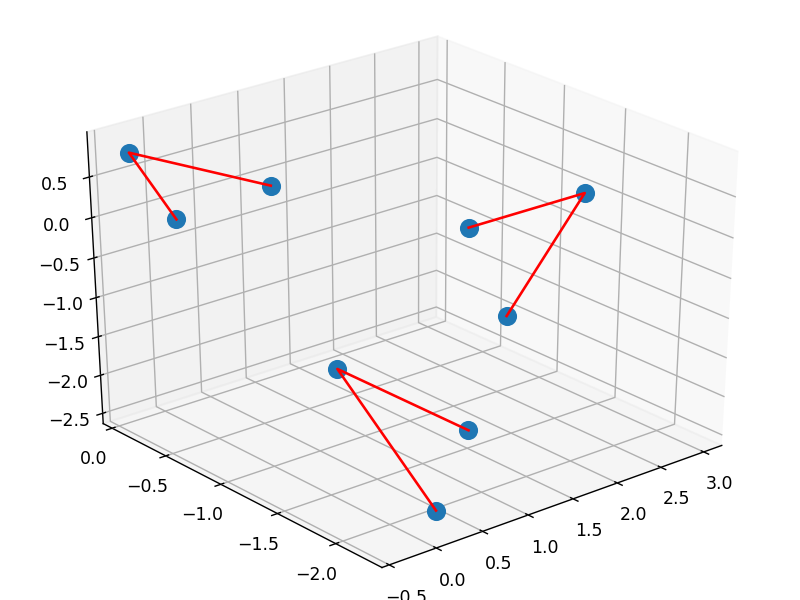

interactive(children=(IntSlider(value=180, description='angle', max=360, step=10), Output()), _dom_classes=('w…

In [21]:
interactive_graph(Water_data, bond(3, 0.8, 1.5, Water_data)) 

<IPython.core.display.Javascript object>


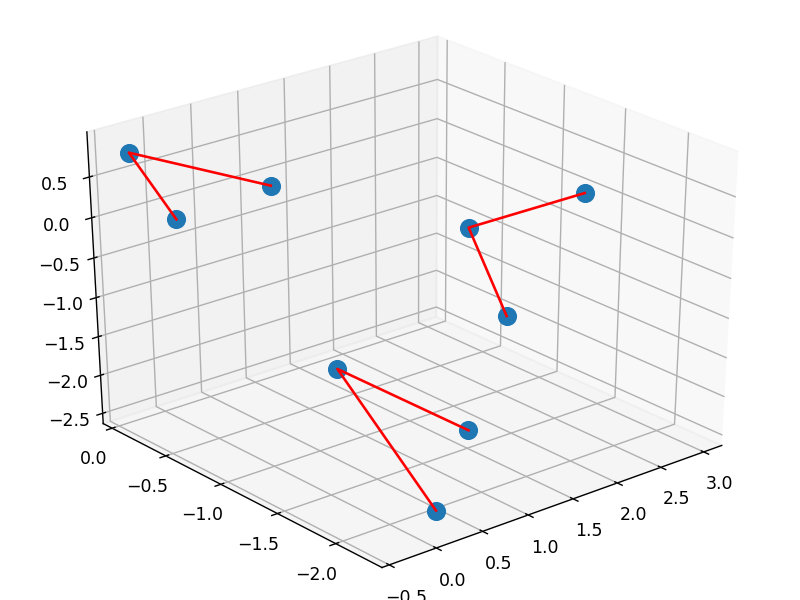

interactive(children=(IntSlider(value=180, description='angle', max=360, step=10), Output()), _dom_classes=('w…

In [22]:
interactive_graph(Water_data, bond_2(1.5, Water_data)) 

For the second data set, by rotating both the graphs by 320 degrees, we can see once again that two of the atomic groups are connected in a different way but they have been still considered part of the same molecule in both cases. 

<IPython.core.display.Javascript object>


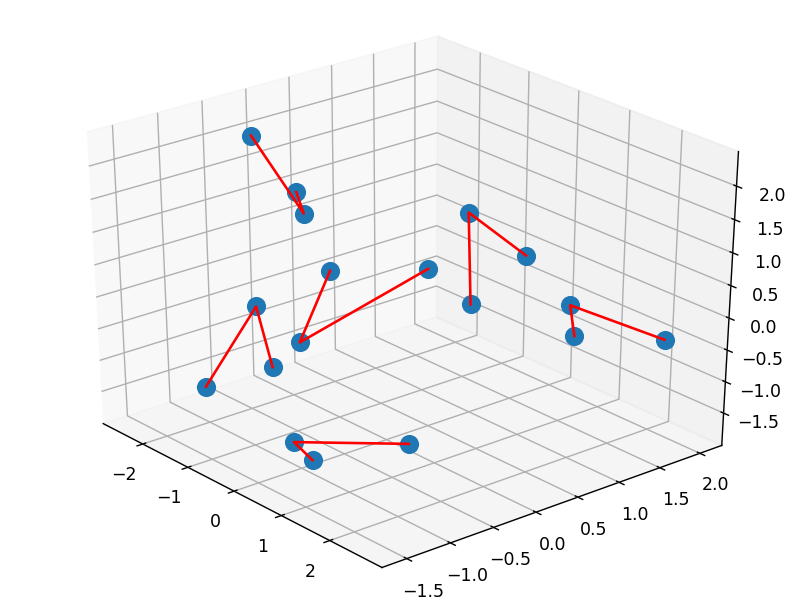

interactive(children=(IntSlider(value=180, description='angle', max=360, step=10), Output()), _dom_classes=('w…

In [23]:
interactive_graph(Prism_data, bond(3, 0.8, 1.5, Prism_data)) 

<IPython.core.display.Javascript object>


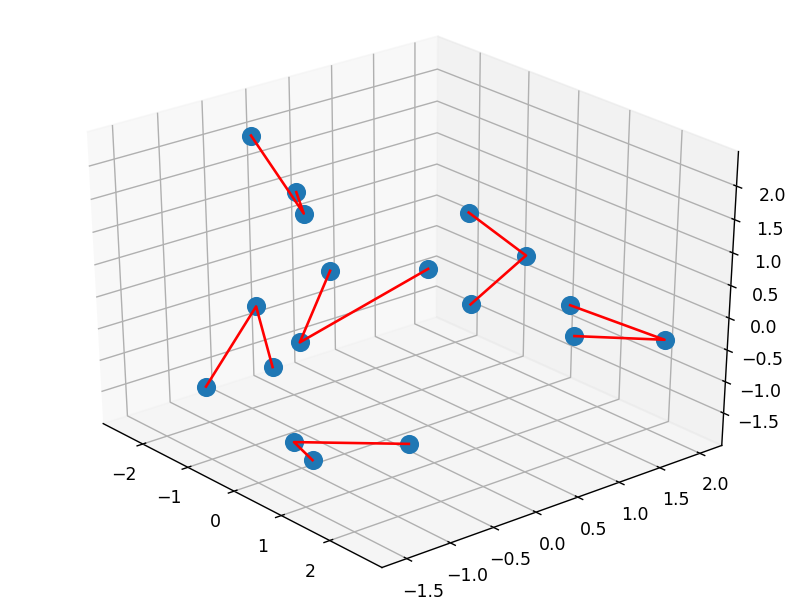

interactive(children=(IntSlider(value=180, description='angle', max=360, step=10), Output()), _dom_classes=('w…

In [24]:
interactive_graph(Prism_data, bond_2(1.5, Prism_data)) 

After gaining once more confermation that the two methods give the same results, I didn't find particularly helpful to compare the results for the third and the fourth data sets since to keep track of 11 and 27 different molecules respectively isn't an easy task visually. It should be enough to see that atoms in the same portion of space are allocated to the same molecules, as it should be. 

<IPython.core.display.Javascript object>


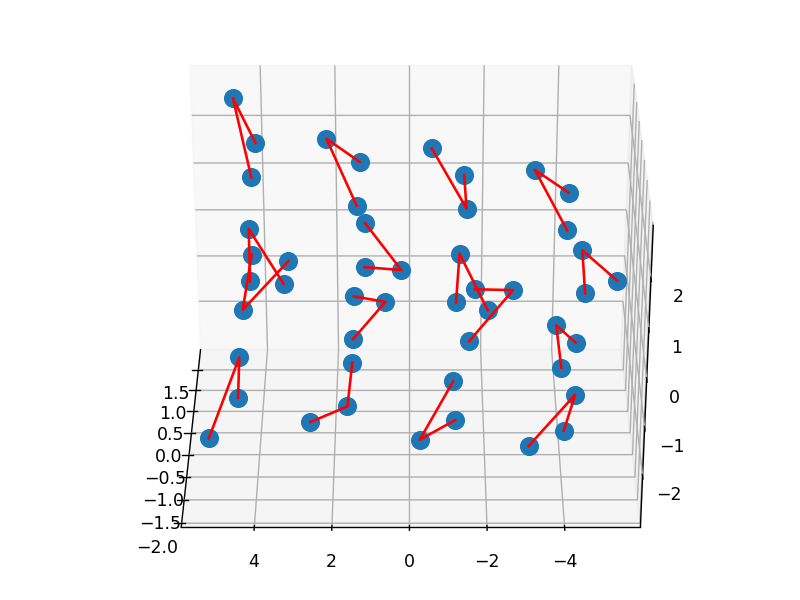

interactive(children=(IntSlider(value=180, description='angle', max=360, step=10), Output()), _dom_classes=('w…

In [25]:
interactive_graph(Mystery_data, bond_2(1.5, Mystery_data)) 

<IPython.core.display.Javascript object>


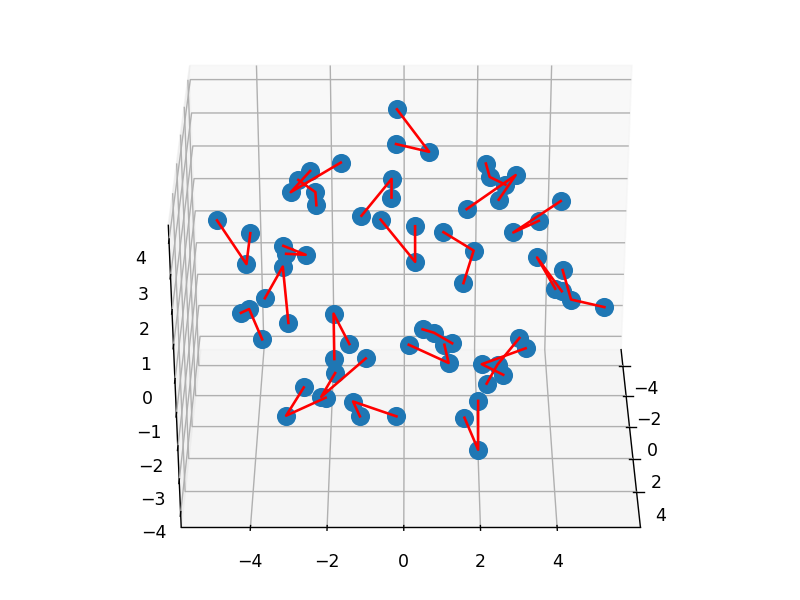

interactive(children=(IntSlider(value=180, description='angle', max=360, step=10), Output()), _dom_classes=('w…

In [26]:
interactive_graph(Mixed_data, bond_2(1.5, Mixed_data)) 

**6 - Conclusion**

Both the functions devised categorise appropriately the atomic positions into subgroups according to the molecules they belong to with identical results using water molecules, but the second function is going to be quicker most of the times or at worse as slow as the first one, making it the preferrable choice. For molecules that do not have a central atom connected to all the others the first function becomes useless, while the second is still able to provide the answers we were looking for. The process of merging the pairs into triples that we used for the second function can easily be iterated to obtain quadruples representing 4-atom molecules, quintuples representing 5-atom molecules and so on, making it very versatile in this regard. The only issue that may arise is with multiple kinds of molecules with very different atomic distances, which may cause inaccurate results due to the fact that the bond length may vary significantly from molecule to molecule.    

**References**

[1] Bondy JA, Murty US. Graph theory with applications. London: Macmillan; 1976 Jun 1.

[2] Hill C. Learning Scientific Programming with Python. Cambridge University Press; 2015.

[3] Wikipedia contributors. K-d tree [Internet]. Wikipedia, The Free Encyclopedia; 2019 May 3, 10:43 UTC [Cited 2019 Mar 31]. Available from: https://en.wikipedia.org/w/index.php?title=K-d_tree&oldid=895305987.

[4] Wikipedia contributors. Directed graph [Internet]. Wikipedia, The Free Encyclopedia; 2019 Feb 12, 03:55 UTC [Cited 2019 Mar 31]. Available from: https://en.wikipedia.org/w/index.php?title=Directed_graph&oldid=882917206.

[5] Wikipedia contributors. Tree (data structure) [Internet]. Wikipedia, The Free Encyclopedia; 2019 May 12, 12:52 UTC [Cited 2019 Mar 31]. Available from: https://en.wikipedia.org/w/index.php?title=Tree_(data_structure)&oldid=896720903.

[6] C. Liu at alia, Journal of Chemical Theory and Computation, 2017

[7] Spatial Algorithms and Data Structures (scipy.spatial). Scipy Docs for Release 0.14.0; 2014 May 11 [Cited 2019 Mar 31]. Available from: https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.spatial.KDTree.html